In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')

In [3]:
#to change the column names to lower case for eas of typing column names
train.columns = [x.lower() for x in train.columns]
test.columns = [x.lower() for x in test.columns]

In [4]:
train.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [5]:
test.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [6]:
train.dtypes

gender                 object
married                object
dependents             object
education              object
self_employed          object
applicant_income        int64
coapplicant_income    float64
loan_amount             int64
term                  float64
credit_history        float64
area                   object
status                 object
dtype: object

In [7]:
train.shape

(614, 12)

In [8]:
#to only display column with missing values
missing_df = train.isnull().sum(axis = 0)
missing_df = missing_df[missing_df != 0]
missing_df

gender            13
married            3
dependents        15
self_employed     32
term              14
credit_history    50
dtype: int64

6 columns have missing values

# EDA

Categorical Variable

Gender

In [9]:
train.gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: gender, dtype: int64

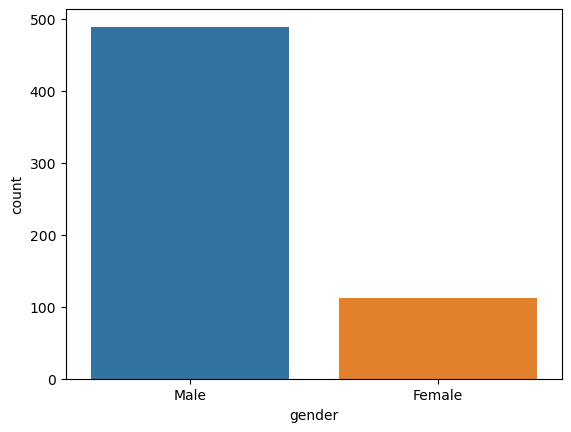

In [10]:
sns.countplot(x='gender', data = train)
plt.show()

In [11]:
count_male = len(train[train.gender == 'Male'])
count_female = len(train[train.gender == 'Female'])
count_null = len(train[train.gender.isnull()])

print("Percentage of Male applicant: {:.2f} %".format((count_male / (len(train.gender))*100)))
print("Percentage of Female applicant: {:.2f} %".format((count_female / (len(train.gender))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.gender))*100)))

Percentage of Male applicant: 79.64 %
Percentage of Female applicant: 18.24 %
Missing values percentage: 2.12 %


Male applicants are more than 4 times their female counterparts

Married

In [12]:
train.married.value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: married, dtype: int64

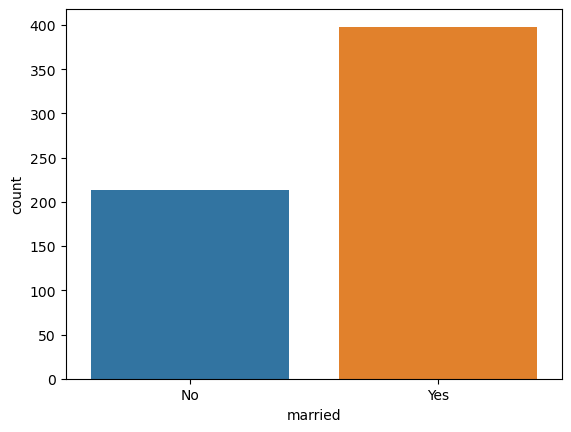

In [13]:
sns.countplot(x='married', data = train)
plt.show()

In [14]:
count_married = len(train[train.married == 'Yes'])
count_not_married = len(train[train.married == 'No'])
count_null = len(train[train.gender.isnull()])

print("Percentage of Married: {:.2f} %".format((count_married / (len(train.married))*100)))
print("Percentage of Not Married: {:.2f} %".format((count_not_married / (len(train.married))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.gender))*100)))

Percentage of Married: 64.82 %
Percentage of Not Married: 34.69 %
Missing values percentage: 2.12 %


Percentage of Married applicants is significantly higher than the Non Married applicants

Education

In [15]:
train.education.value_counts()

Graduate        480
Not Graduate    134
Name: education, dtype: int64

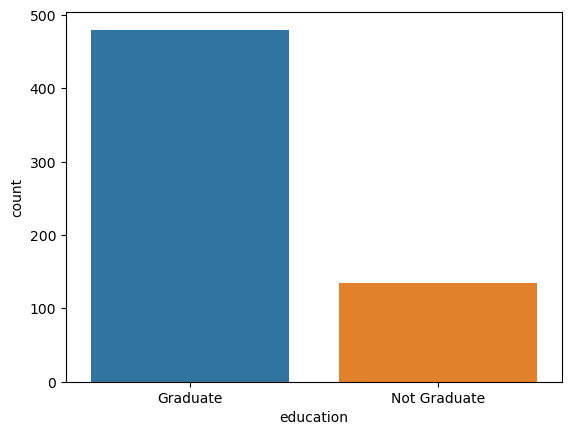

In [16]:
sns.countplot(x = 'education', data = train)
plt.show()

In [17]:
count_graduate = len(train[train.education == 'Graduate'])
count_not_graduate = len(train[train.education == 'Not Graduate'])
count_null = len(train[train.education.isnull()])

print("Percentage of graduate applicant: {:.2f} %".format((count_graduate / (len(train.education))*100)))
print("Percentage of Not graduate applicant: {:.2f} %".format((count_not_graduate / (len(train.education))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.education))*100)))

Percentage of graduate applicant: 78.18 %
Percentage of Not graduate applicant: 21.82 %
Missing values percentage: 0.00 %


Self Employed

In [18]:
train.self_employed.value_counts(dropna = False)

No     500
Yes     82
NaN     32
Name: self_employed, dtype: int64

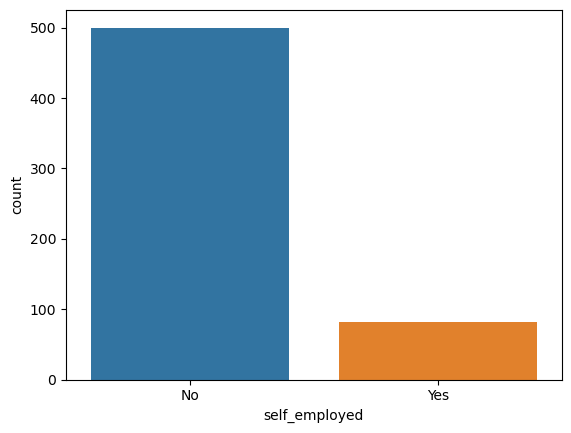

In [19]:
sns.countplot( x = 'self_employed', data = train)
plt.show()

In [20]:
count_no = len(train[train.self_employed == 'No'])
count_yes = len(train[train.self_employed == 'Yes'])
count_null = len(train[train.self_employed.isnull()])

print("Percentage of Not self employed: {:.2f} %".format((count_no / (len(train.self_employed))*100)))
print("Percentage of self employed: {:.2f} %".format((count_yes / (len(train.self_employed))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.self_employed))*100)))

Percentage of Not self employed: 81.43 %
Percentage of self employed: 13.36 %
Missing values percentage: 5.21 %


Credit History

In [21]:
train.credit_history.value_counts(dropna = False)

1.0    475
0.0     89
NaN     50
Name: credit_history, dtype: int64

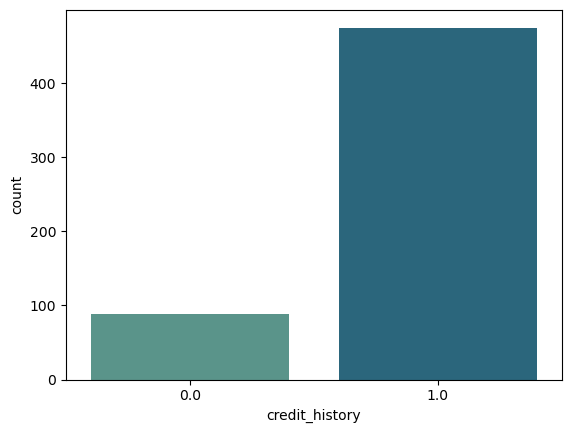

In [22]:
sns.countplot(x = 'credit_history', data = train,  palette = "crest")
plt.show()

In [23]:
count_1 = len(train[train.credit_history == 1])
count_0 = len(train[train.credit_history == 0])
count_null = len(train[train.credit_history.isnull()])

print("Percentage of Good credit history: {:.2f} %".format((count_1 / (len(train.credit_history))*100)))
print("Percentage of Bad credit history: {:.2f} %".format((count_0 / (len(train.credit_history))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.credit_history))*100)))

Percentage of Good credit history: 77.36 %
Percentage of Bad credit history: 14.50 %
Missing values percentage: 8.14 %


Area

In [24]:
train.area.value_counts(dropna = False)

Semiurban    233
Urban        202
Rural        179
Name: area, dtype: int64

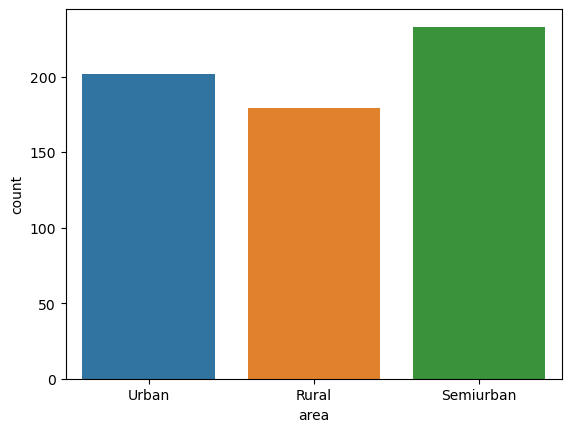

In [25]:
sns.countplot(x = "area", data = train)
plt.show()

In [26]:
count_urban = len(train[train.area == 'Urban'])
count_rural = len(train[train.area == 'Rural'])
count_semi_urban = len(train[train.area == 'Semiurban'])
count_null = len(train[train.area.isnull()])

print("Percentage of Urban: {:.2f} %".format((count_urban / (len(train.area))*100)))
print("Percentage of Rural: {:.2f} %".format((count_rural / (len(train.area))*100)))
print("Percentage of Semiurban: {:.2f} %".format((count_semi_urban / (len(train.area))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.area))*100)))

Percentage of Urban: 32.90 %
Percentage of Rural: 29.15 %
Percentage of Semiurban: 37.95 %
Missing values percentage: 0.00 %


Loan Status

In [27]:
 train.status.value_counts(dropna=False)

Y    422
N    192
Name: status, dtype: int64

In [28]:
 train.status.value_counts()/len(train) * 100

Y    68.729642
N    31.270358
Name: status, dtype: float64

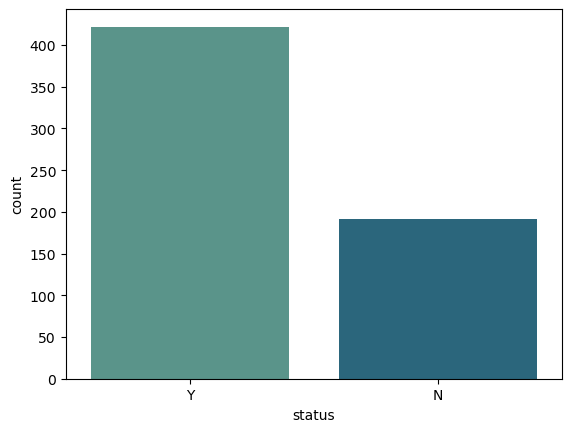

In [29]:
sns.countplot(x = "status", data = train, palette = "crest")
plt.show()

In [30]:
count_Y = len(train[train.status == 'Y'])
count_N = len(train[train.status == 'N'])
count_null = len(train[train.status.isnull()])

print("Percentage of Approved: {:.2f} %".format((count_Y / (len(train.status))*100)))
print("Percentage of Rejected: {:.2f} %".format((count_N / (len(train.status))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.status))*100)))

Percentage of Approved: 68.73 %
Percentage of Rejected: 31.27 %
Missing values percentage: 0.00 %


In [31]:
train.term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: term, dtype: int64

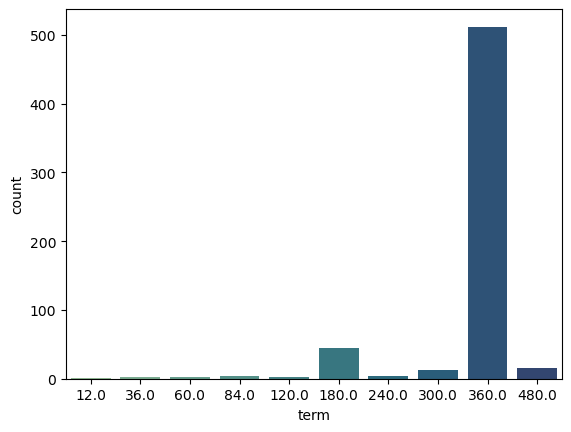

In [32]:
sns.countplot(x = "term", data = train, palette = "crest")
plt.show()

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              356 non-null    object 
 1   married             367 non-null    object 
 2   dependents          357 non-null    object 
 3   education           367 non-null    object 
 4   self_employed       344 non-null    object 
 5   applicant_income    367 non-null    int64  
 6   coapplicant_income  367 non-null    int64  
 7   loan_amount         367 non-null    int64  
 8   term                361 non-null    float64
 9   credit_history      338 non-null    float64
 10  area                367 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.7+ KB


In [34]:
from collections import defaultdict


# Identify the categorical columns to summarize
categorical_columns = ['education', 'self_employed', 'gender', 'married', 'area']

# Create a dictionary to store the counts for each category
category_counts = defaultdict(lambda: defaultdict(int))

# Iterate through the columns and rows of the DataFrame
for column in categorical_columns:
    for index, value in train[column].iteritems():
        category_counts[column][value] += 1

# Print the summarized data
for column, counts in category_counts.items():
    print(f'Summary for {column}:')
    for category, count in counts.items():
        print(f'{category}: {count}')
    print()


Summary for education:
Graduate: 480
Not Graduate: 134

Summary for self_employed:
No: 500
Yes: 82
nan: 32

Summary for gender:
Male: 489
Female: 112
nan: 13

Summary for married:
No: 213
Yes: 398
nan: 3

Summary for area:
Urban: 202
Rural: 179
Semiurban: 233



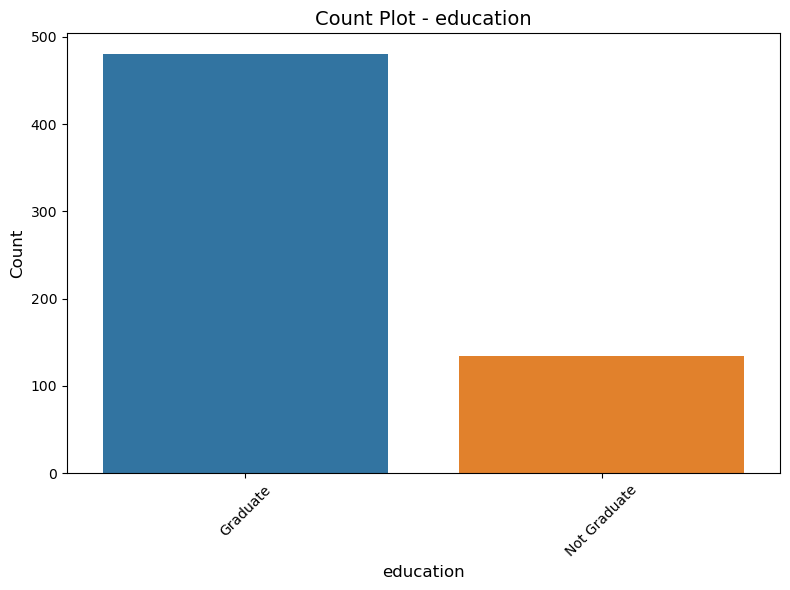

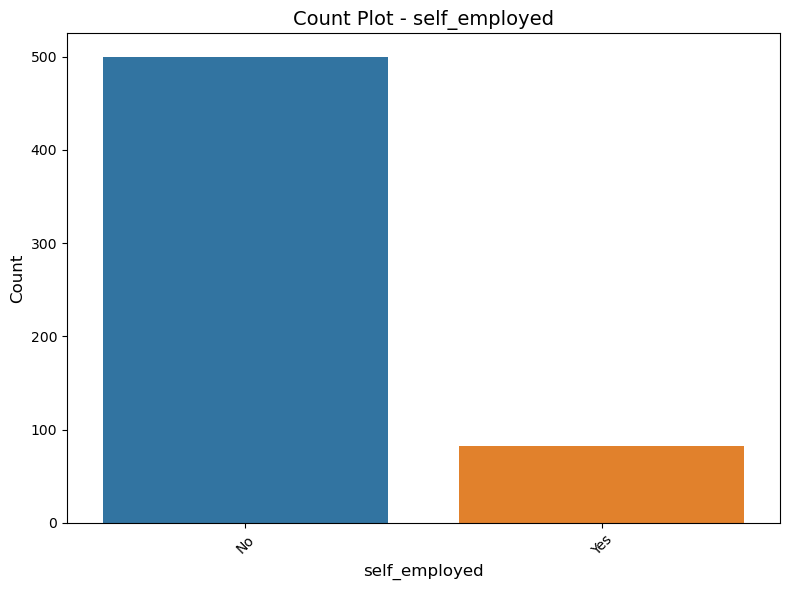

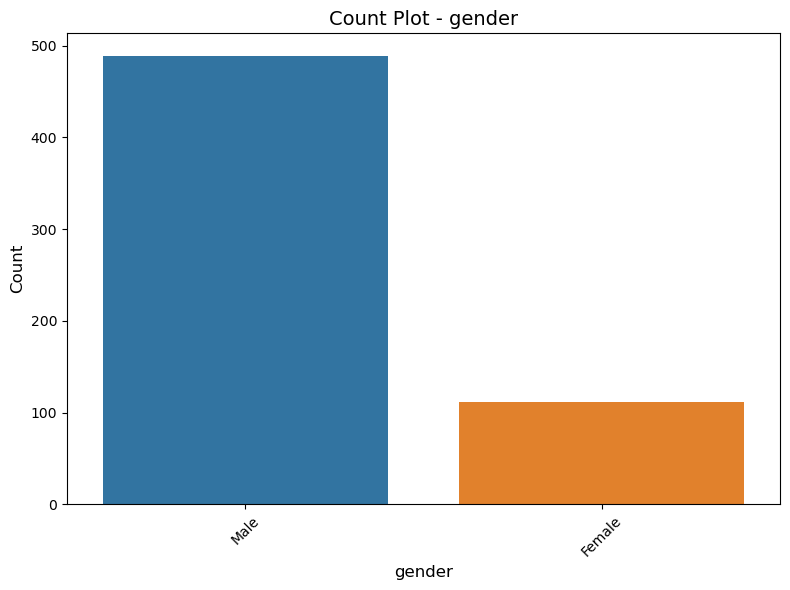

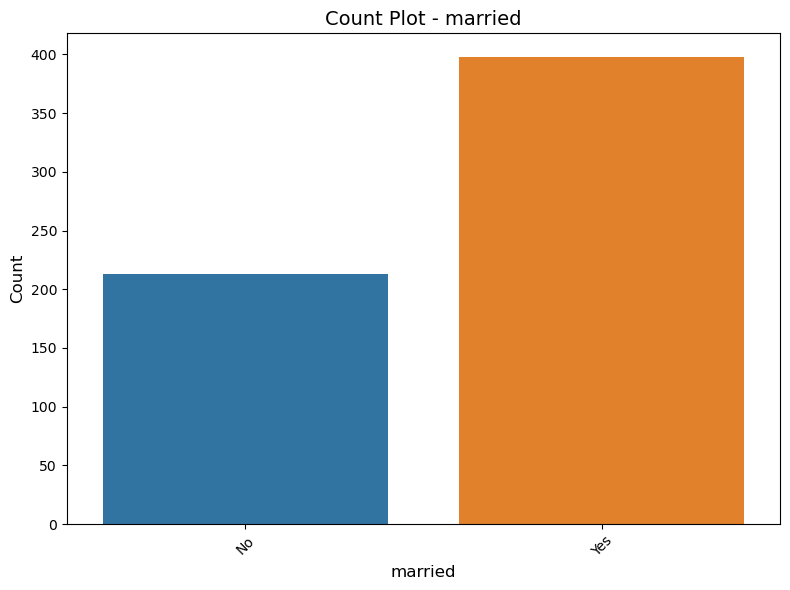

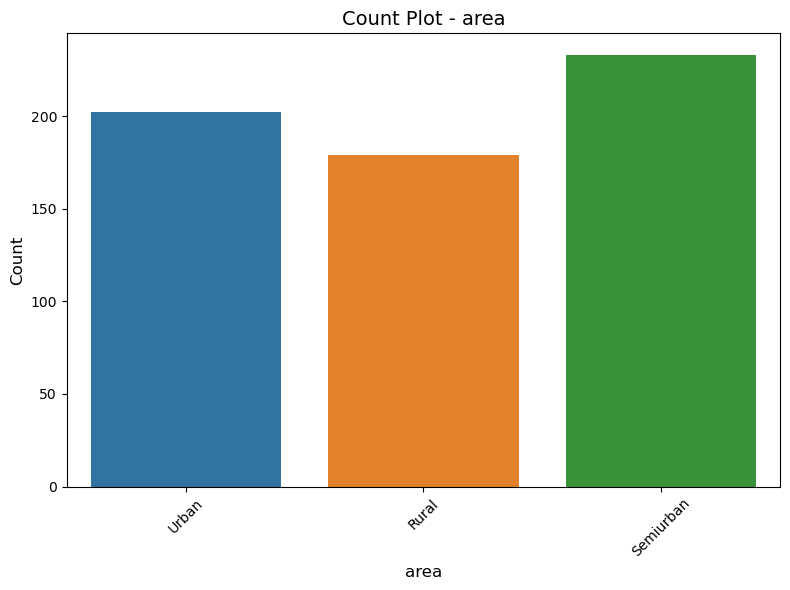

In [35]:
# Identify the categorical columns to plot
categorical_columns =  ['education', 'self_employed', 'gender', 'married', 'area']

# Create count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Create the count plot using seaborn
    sns.countplot(data=train, x=column)

    plt.title(f'Count Plot - {column}', fontsize=14)  # Set the plot title
    plt.xlabel(column, fontsize=12)  # Set the x-axis label
    plt.ylabel('Count', fontsize=12)  # Set the y-axis label

    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()  # Adjust the plot layout

    plt.show()


## Numerical Variables

### Describing Numerical Variables

In [36]:
train[['applicant_income','coapplicant_income','loan_amount']].describe()

,applicant_income,coapplicant_income,loan_amount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,5.403459e+05,1.621246e+05,1.414104e+07
std,6.109042e+05,2.926248e+05,8.815682e+06
min,1.500000e+04,0.000000e+00,0.000000e+00
25%,2.877500e+05,0.000000e+00,9.800000e+06
50%,3.812500e+05,1.188500e+05,1.250000e+07
75%,5.795000e+05,2.297250e+05,1.647500e+07
max,8.100000e+06,4.166700e+06,7.000000e+07


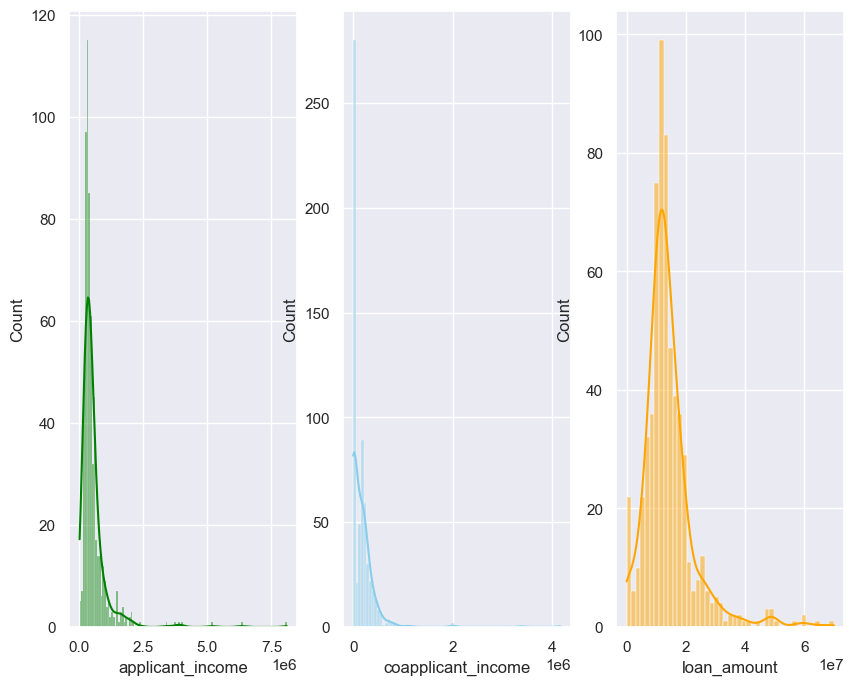

In [37]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "applicant_income", kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "coapplicant_income", kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "loan_amount", kde = True, color = 'orange');

Heatmap

<Axes: >

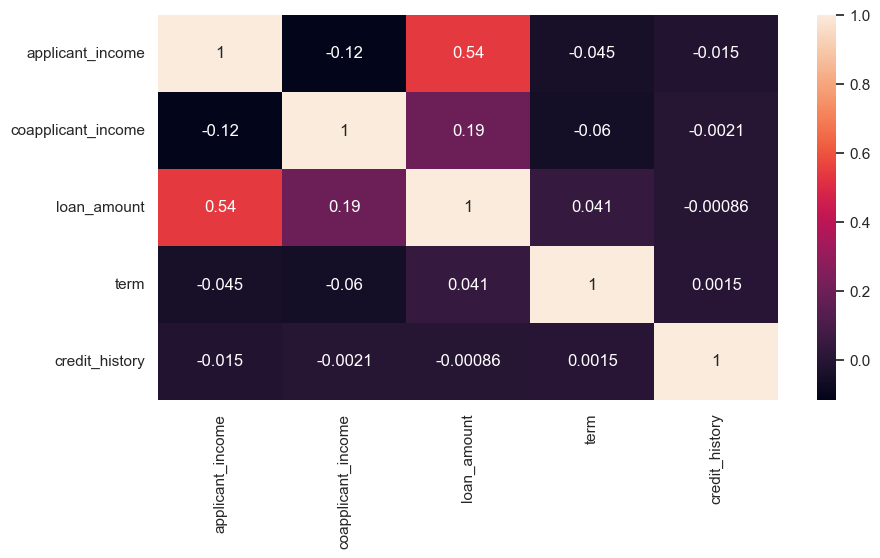

In [38]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot = True)

### Data Processing

#### Dealing with nulls

Data Imputation for categorical variables

In [39]:
train['gender'].fillna(train['gender'].mode()[0],inplace = True)
train['married'].fillna(train['married'].mode()[0],inplace = True)
train['dependents'].fillna(train['dependents'].mode()[0],inplace = True)
train['self_employed'].fillna(train['self_employed'].mode()[0],inplace = True)
train['credit_history'].fillna(train['credit_history'].mode()[0],inplace = True)
train['term'].fillna(train['term'].mode()[0],inplace = True)

In [40]:
test['gender'].fillna(test['gender'].mode()[0],inplace = True)
test['married'].fillna(test['married'].mode()[0],inplace = True)
test['dependents'].fillna(test['dependents'].mode()[0],inplace = True)
test['self_employed'].fillna(test['self_employed'].mode()[0],inplace = True)
test['credit_history'].fillna(test['credit_history'].mode()[0],inplace = True)
test['term'].fillna(test['term'].mode()[0],inplace = True)

In [41]:
#to only display column with missing values
missing_df = train.isnull().sum(axis = 0)
missing_df = missing_df[missing_df != 0]
missing_df

Series([], dtype: int64)

In [42]:
train.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [43]:
train['married'] = train['married'].replace({'Yes': 1, 'No': 0})
train['self_employed'] = train['self_employed'].replace({'Yes': 1, 'No': 0})
train['status'] = train['status'].replace({'Y': 1, 'N': 0})


In [44]:
test['married'] = test['married'].replace({'Yes': 1, 'No': 0})
test['self_employed'] = test['self_employed'].replace({'Yes': 1, 'No': 0})



In [45]:
train.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area,status
0,Male,0,0,Graduate,0,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0,600000,0.0,14100000,360.0,1.0,Urban,1


In [46]:
test.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,area
0,Male,1,0,Graduate,0,572000,0,11000000,360.0,1.0,Urban
1,Male,1,1,Graduate,0,307600,150000,12600000,360.0,1.0,Urban
2,Male,1,2,Graduate,0,500000,180000,20800000,360.0,1.0,Urban
3,Male,1,2,Graduate,0,234000,254600,10000000,360.0,1.0,Urban
4,Male,0,0,Not Graduate,0,327600,0,7800000,360.0,1.0,Urban


In [47]:
train = pd.get_dummies(train)
# Drop columns
train = train.drop(['gender_Female', 'education_Not Graduate', 'area_Rural'], axis = 1)

# Rename columns name
new = {'gender_Male': 'gender', 'education_Graduate': 'Education', 'area_Rural': 'area' }
       
train.rename(columns = new, inplace = True)

In [48]:
test = pd.get_dummies(test)
# Drop columns
test = test.drop(['gender_Female', 'education_Not Graduate', 'area_Rural'], axis = 1)

# Rename columns name
new = {'gender_Male': 'gender', 'education_Graduate': 'Education', 'area_Rural': 'area' }
       
test.rename(columns = new, inplace = True)

In [49]:
train.head()

,married,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,status,gender,dependents_0,dependents_1,dependents_2,dependents_3+,Education,area_Semiurban,area_Urban
0,0,0,584900,0.0,15000000,360.0,1.0,1,1,1,0,0,0,1,0,1
1,1,0,458300,150800.0,12800000,360.0,1.0,0,1,0,1,0,0,1,0,0
2,1,1,300000,0.0,6600000,360.0,1.0,1,1,1,0,0,0,1,0,1
3,1,0,258300,235800.0,12000000,360.0,1.0,1,1,1,0,0,0,0,0,1
4,0,0,600000,0.0,14100000,360.0,1.0,1,1,1,0,0,0,1,0,1


In [50]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier

In [51]:
#Split the Data into Training and Testing Sets

y = train['status']
x = train.drop('status', axis=1)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Logistic Regression

In [53]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)

print('LR accuracy: {:.2f}%'.format(LRAcc*100))

[[ 3 40]
 [ 3 77]]
LR accuracy: 65.04%


K-Nearest Neighbour (KNN)

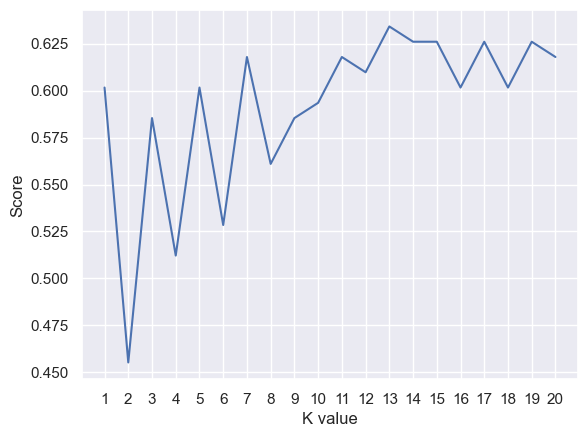

KNN best accuracy: 63.41%


In [54]:
score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score_knn.append(knn.score(x_test, y_test))
    
plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Support Vector Machine (SVM)

In [55]:
svc = SVC(kernel='rbf', max_iter=500)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

[[ 0 43]
 [ 0 80]]
SVC accuracy: 65.04%


Naive Bayes

In [56]:
nbc1 = CategoricalNB()
nbc1.fit(x_train, y_train)

y_pred = nbc1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.94      0.35      0.51        43
           1       0.74      0.99      0.84        80

    accuracy                           0.76       123
   macro avg       0.84      0.67      0.68       123
weighted avg       0.81      0.76      0.73       123

[[15 28]
 [ 1 79]]
Categorical Naive Bayes accuracy: 76.42%


Decision Tree

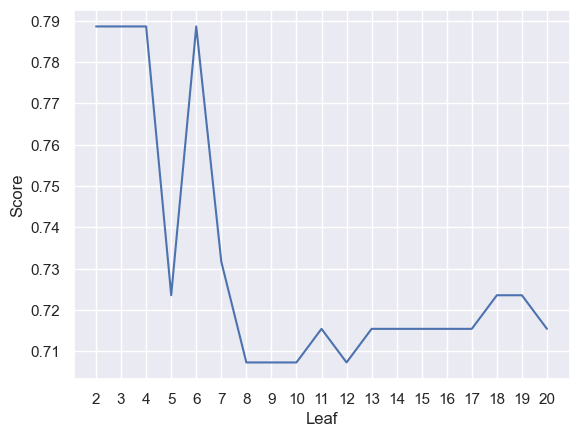

Decision Tree Accuracy: 78.86%


In [57]:
score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc.fit(x_train, y_train)
    score_dt.append(dtc.score(x_test, y_test))
    
plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(score_dt)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Random Forest

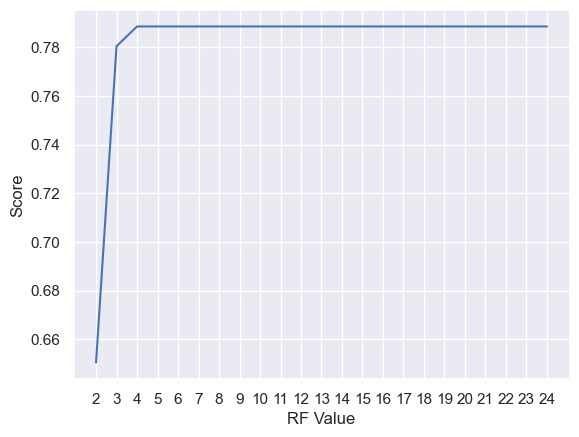

Random Forest Accuracy:  78.86%


In [58]:
score_rf = []
for i in range(2,25):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rfc.fit(x_train, y_train)
    score_rf.append(rfc.score(x_test, y_test))
    
plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Model Comparison

In [59]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM','Categorical NB','Decision Tree', 
                                  'Random Forest',], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, DTAcc*100, 
                                     RFAcc*100, ]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Decision Tree,78.861789
5,Random Forest,78.861789
3,Categorical NB,76.422764
0,Logistic Regression,65.040650
2,SVM,65.040650
1,K Neighbors,63.414634


Going forward with Decision Tree in order to calculate the y_pred for out test loan dataset

In [61]:
y_pred = dtc.predict(test)

In [62]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [66]:
new_test = dtc.predict(test)

In [69]:
test['predicted_status'] = new_test

In [71]:
test.head(15)

,married,self_employed,applicant_income,coapplicant_income,loan_amount,term,credit_history,gender,dependents_0,dependents_1,dependents_2,dependents_3+,Education,area_Semiurban,area_Urban,predicted_status
0,1,0,572000,0,11000000,360.0,1.0,1,1,0,0,0,1,0,1,1
1,1,0,307600,150000,12600000,360.0,1.0,1,0,1,0,0,1,0,1,1
2,1,0,500000,180000,20800000,360.0,1.0,1,0,0,1,0,1,0,1,1
3,1,0,234000,254600,10000000,360.0,1.0,1,0,0,1,0,1,0,1,1
4,0,0,327600,0,7800000,360.0,1.0,1,1,0,0,0,0,0,1,0
5,1,1,216500,342200,15200000,360.0,1.0,1,1,0,0,0,0,0,1,1
6,0,0,222600,0,5900000,360.0,1.0,0,0,1,0,0,0,1,0,1
7,1,0,388100,0,14700000,360.0,0.0,1,0,0,1,0,0,0,0,0
8,1,0,1363300,0,28000000,240.0,1.0,1,0,0,1,0,1,0,1,1
9,0,0,240000,240000,12300000,360.0,1.0,1,1,0,0,0,0,1,0,1
